<a href="https://colab.research.google.com/github/melhartu/UP_Analitica_Predictiva_2024/blob/main/Primera_Evaluaci%C3%B3n_Anal%C3%ADtica_Predictiva_UP_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera evaluación
## * Curso: Analítica Predictiva
## * Nombre: Melissa Hartmann Ugaz

Enviar solucionado aquí: ja.naranjos@up.edu.pe

In [292]:
# Durante la evaluación, escriba el código que utilizó para comprobar cómo llega a la respuesta.
# Por ejemplo:

# ¿Cuánto es x+1 si x = 1?

x = 1
print(x+1)


2


In [293]:
# 1) Lea el archivo ~/data.csv y muestre un resumen de los datos.

# Importar bibliotecas de Pandas.
import pandas as pd
pd.set_option('display.max_columns',None) # Configura la opcion de tener todas las columnas visibles.
df = pd.read_csv('/content/dataset.csv')  # Leer el dataset CSV.
print(df.columns)                         # Imprimir las variables.
df_rows = len(df)                         # Definir número de filas
print(f"Número de filas del Data Frame original: {df_rows}") # Imprimir el número de filas.
tracks = df['track_id'].value_counts()    # Identificar duplicados
df_rows2 = len(tracks)                    # Contar el número correcto de track_id's
print(f"Número de filas sin track_id's duplicados: {df_rows2}") # Imprimir

# La data muestra track IDs que han sido duplicados. Hay que agrupar las diferentes variables.
# Asegurarnos de que las variables nominales sean tipo "str" y las variables ordinales sean "float" para evitar errores:
df['track_id'] = df['track_id'].astype(str)
df['track_genre'] = df['track_genre'].astype(str)
df['artists'] = df['artists'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['album_name'] = df['album_name'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['explicit'] = df['explicit'].astype(str)
df['popularity'] = df['popularity'].astype(float)
df['danceability'] = df['danceability'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)
df['key'] = df['key'].astype(float)
df['loudness'] = df['loudness'].astype(float)
df['mode'] = df['mode'].astype(float)
df['speechiness'] = df['speechiness'].astype(float)
df['acousticness'] = df['acousticness'].astype(float)
df['instrumentalness'] = df['instrumentalness'].astype(float)
df['liveness'] = df['liveness'].astype(float)
df['valence'] = df['valence'].astype(float)
df['tempo'] = df['tempo'].astype(float)
df['time_signature'] = df['time_signature'].astype(float)
df['energy'] = df['energy'].astype(float)

# Para las variables nominales, podemos separarlas utilizando ";". Para las ordinales, se puede sacar un promedio:
df_clean1 = df.groupby(['track_id', 'track_name','artists','album_name','explicit'], as_index=False)['track_genre'].agg(';'.join) # track_genre
df_clean2 = df.groupby(['track_id'], as_index=False).agg({'popularity': 'mean'})        # popularity
df_clean3 = df.groupby(['track_id'], as_index=False).agg({'danceability': 'mean'})      # danceability
df_clean4 = df.groupby(['track_id'], as_index=False).agg({'duration_ms': 'mean'})       # duration_ms. NOTE: Puede que sean versiones distintas (larga/corta)
df_clean5 = df.groupby(['track_id'], as_index=False).agg({'key': 'mean'})               # key
df_clean6 = df.groupby(['track_id'], as_index=False).agg({'loudness': 'mean'})          # loudness
df_clean7 = df.groupby(['track_id'], as_index=False).agg({'mode': 'mean'})              # mode
df_clean8 = df.groupby(['track_id'], as_index=False).agg({'speechiness': 'mean'})       # speechiness
df_clean9 = df.groupby(['track_id'], as_index=False).agg({'acousticness': 'mean'})      # acousticness
df_clean10 = df.groupby(['track_id'], as_index=False).agg({'instrumentalness': 'mean'}) # instrumentalness
df_clean11 = df.groupby(['track_id'], as_index=False).agg({'liveness': 'mean'})         # liveness
df_clean12 = df.groupby(['track_id'], as_index=False).agg({'valence': 'mean'})          # valence
df_clean13 = df.groupby(['track_id'], as_index=False).agg({'tempo': 'mean'})            # tempo
df_clean14 = df.groupby(['track_id'], as_index=False).agg({'time_signature': 'mean'})   # time_signature
df_clean15 = df.groupby(['track_id'], as_index=False).agg({'energy': 'mean'})           # energy

# Agrupar todos los arrays en un solo data frame utilizando "for":
df_clean = df_clean1 # Define el data frame como la primera variable
df_array = [df_clean2, df_clean3, df_clean4, df_clean5, df_clean6, df_clean7, df_clean8, df_clean9, df_clean10, df_clean11, df_clean12, df_clean13, df_clean14, df_clean15]
for i in df_array: # Combina la primera variable para combinarlo con el track_id correspondiente del data_array.
    df_clean = pd.merge(df_clean, i, on='track_id', how='inner')

df_clean_rows = len(df_clean)                                        # Verificar el número de filas
print(f"Número de fila después del agrupamiento: {df_clean_rows}") # Imprimir

print("Resumen de la data sin los track_id's duplicados:")
df_clean.head()


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
Número de filas del Data Frame original: 114000
Número de filas sin track_id's duplicados: 89741
Número de fila después del agrupamiento: 89741
Resumen de la data sin los track_id's duplicados:


,track_id,track_name,artists,album_name,explicit,track_genre,popularity,danceability,duration_ms,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,energy
0,0000vdREvCVMxbQTkS888c,Lolly,Rill,Lolly,True,german,44.0,0.910,160725.0,8.0,-9.844,0.0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4.0,0.374
1,000CC8EParg64OmTxVnZ0p,It's All Coming Back To Me Now (Glee Cast Vers...,Glee Cast,Glee Love Songs,False,club,47.0,0.269,322933.0,0.0,-7.361,1.0,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4.0,0.516
2,000Iz0K615UepwSJ5z2RE5,Böxig Leise - Pig & Dan Remix,Paul Kalkbrenner;Pig&Dan,X,False,minimal-techno,22.0,0.686,515360.0,5.0,-13.264,0.0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4.0,0.560
3,000RDCYioLteXcutOjeweY,Teeje Week,Jordan Sandhu,Teeje Week,False,hip-hop,62.0,0.679,190203.0,0.0,-3.537,1.0,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4.0,0.770
4,000qpdoc97IMTBvF8gwcpy,Tief,Paul Kalkbrenner,Zeit,False,minimal-techno,19.0,0.519,331240.0,6.0,-13.606,0.0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4.0,0.431


In [294]:
# 2) ¿Cuáles son los 5 artistas más populares?
# Ya que hay más de un artista en algunas filas, primero podemos separar estos en filas:
df_expand_artists = df_clean.assign(artists=df['artists'].str.split(';')).explode('artists')

# Los artistas más populares pueden ser definidos como la suma de popularidad de todas sus canciones
popularity_per_artist_sum = df_expand_artists.groupby('artists')['popularity'].sum().reset_index()

# Renombrar la columna como el promedio de popularidad:
popularity_per_artist_sum = popularity_per_artist_sum.rename(columns={'popularity': 'popularity_sum'})

# Poner la columna de popularity prom en descendiendo:
print("Asumiendo que la definicion de los artistas más populares es la suma de la popularidad de todas sus canciones, \n los top 5 artistas son:")
popularity_per_artist_sum.sort_values(by=['popularity_sum'],ascending=False).head(5)

Asumiendo que la definicion de los artistas más populares es la suma de la popularidad de todas sus canciones, 
 los top 5 artistas son:


,artists,popularity_sum
9372,J Balvin,16638.166667
2001,Bad Bunny,12851.500000
4827,Daddy Yankee,12194.333333
7797,George Jones,11591.500000
7026,Feid,11584.000000


In [295]:
# 3) De los 5 artistas más populares, ¿cuáles son las 5 canciones más largas?

# Filtrar canciones de artistas especificos:
Songs_Artist1 = df_clean[df_clean['artists'].str.contains('J Balvin')]
Songs_Artist2 = df_clean[df_clean['artists'].str.contains('Bad Bunny')]
Songs_Artist3 = df_clean[df_clean['artists'].str.contains('Daddy Yankee')]
Songs_Artist4 = df_clean[df_clean['artists'].str.contains('George Jones')]
Songs_Artist5 = df_clean[df_clean['artists'].str.contains('Feid')]

# Juntar todas las canciones de estos artistas usando concat:
All_songs = pd.concat([Songs_Artist1,Songs_Artist2,Songs_Artist3,Songs_Artist4,Songs_Artist5])
All_songs = All_songs.drop_duplicates(subset='track_name')                # Borrar los duplicados
Longest_songs = All_songs.sort_values(by=['duration_ms'],ascending=False) # Sort length en descendiendo
print("Las 5 canciones más largas de los top 5 artistas:")
Longest_songs[['track_name', 'artists', 'duration_ms']].head(5)           # Filtra a columna de artists y popularidad para los top 5


Las 5 canciones más largas de los top 5 artistas:


,track_name,artists,duration_ms
40358,Te Boté - Remix,Nio Garcia;Casper Magico;Bad Bunny;Darell;Ozun...,417920.0
6399,Poblado - Remix,J Balvin;KAROL G;Nicky Jam;Crissin;Totoy El Fr...,392866.0
24512,Loco Contigo - REMIX,DJ Snake;J Balvin;Ozuna;Nicky Jam;Natti Natash...,341875.0
62386,Loco Contigo (with J. Balvin & Ozuna feat. Nic...,DJ Snake;J Balvin;Ozuna;Nicky Jam;Natti Natash...,341875.0
46815,Andrea,Bad Bunny;Buscabulla,339611.0


Mean Absolute Error (test): 16.910406137424953
Mean Absolute Error (train): 16.555973326198394
Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

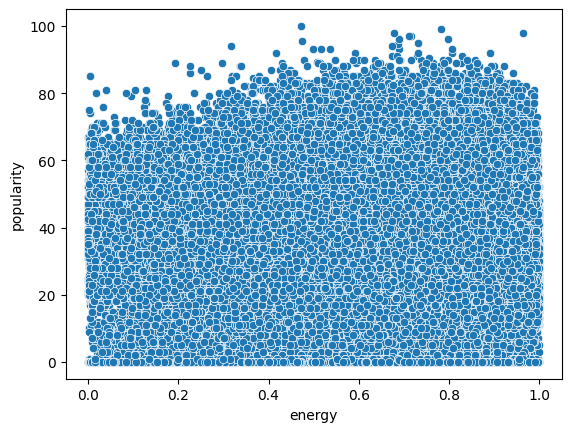

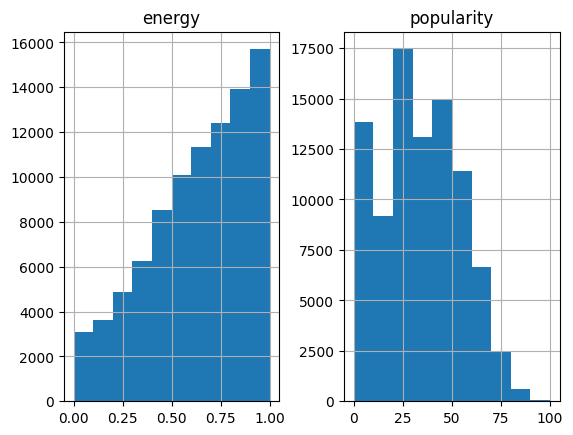

In [296]:
# 4) ¿Existe alguna relación entre la energía de una canción y su popularidad?

# Primero debemos analysar las variables en un scatter plot para evaluar su correlacion:
import seaborn as sns # Graphs - Python data visualization library based on matplotlib
sns.scatterplot(x='energy', y='popularity', data = df_clean) # Plot el scatter graph

import matplotlib.pyplot as plt                       # Importar biblioteca
df_clean[['energy','popularity']].hist(layout=(1,2))  # Plot el histogram de ambas variables

"""Ya que no hay una correlación clara y los histogramos muestran multiples picos,
sugiere que existen diferentes subgrupos y que la relacion es compleja y no-lineal.hasattr
Por ello, podemos usar el RandomForestRegressor para modelarlo. """

# Paso 1: Definir las variables
atributos = ['energy']
X = df_clean[atributos]
y = df_clean['popularity']

# Paso 2: Separar la data en train y test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2) # 0.2 Represent proportion of the dataset to include in the test split

# Paso 3: Entrenar el modelo
from sklearn.ensemble  import RandomForestRegressor
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

y_pred_test = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

# Paso 4: Evaluar
from sklearn import metrics
error_test = metrics.mean_absolute_error(y_test, y_pred_test)
error_train = metrics.mean_absolute_error(y_train, y_pred_train)

print(f"Mean Absolute Error (test): {error_test}")
print(f"Mean Absolute Error (train): {error_train}")

# Paso 5: Optimizar modelo usando el cross-validated grid-search para multiples max_dept
# Cross-validation evalua el modelo dividiendolo en subsets (folds) y hace test en
# diferentes porciones de la data. Es como un decision tree flow-chart empezando en
# el root node y dividiendose hasta llegar a los leaf nodes.
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11]} # Path más largo del root node a una leaf node
grid_search = GridSearchCV(modelo, param_grid=param,
                           n_jobs=-1,  # Acelera el proceso utilizando cores disponibles para búsqueda de CV y param
                           verbose=2,  # Imprme el progreso de la búsqueda
                           scoring='neg_mean_absolute_error', # Se evaluara basadon en el Mean Absolute Error
                           return_train_score=True) # Para tener también los resultados de train
grid_search.fit(X_train, y_train)


In [297]:
# Paso 6: Analizar resultados:
modelo_optimizado = grid_search.best_estimator_
y_pred_test2 = modelo_optimizado.predict(X_test)
error_test2 = metrics.mean_absolute_error(y_test, y_pred_test2)
print("Optimized Mean Absolute Error on Test Set:", error_test2)
print("Best max_depth:", grid_search.best_params_)

# Crear DF con los resultados por cada max_depth
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.head(9)

Optimized Mean Absolute Error on Test Set: 16.827163083281917
Best max_depth: {'max_depth': 9}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.914803,0.012720,0.030388,0.001337,1,{'max_depth': 1},-17.190786,-17.171122,-17.254203,-17.035536,-17.157255,-17.161780,0.071314,11,-17.142958,-17.168627,-17.143209,-17.178933,-17.159599,-17.158665,0.014117
1,2.408354,0.584828,0.061111,0.020215,2,{'max_depth': 2},-17.046075,-17.015738,-17.073995,-16.886811,-16.995494,-17.003623,0.064206,10,-16.982911,-16.991926,-16.974682,-17.031944,-16.997650,-16.995822,0.019682
2,3.425128,0.727287,0.053933,0.000707,3,{'max_depth': 3},-17.002542,-16.973040,-17.030205,-16.846106,-16.950403,-16.960459,0.063201,9,-16.940017,-16.944220,-16.931579,-16.980134,-16.951547,-16.949499,0.016623
3,4.607280,0.891344,0.094018,0.032556,4,{'max_depth': 4},-16.989052,-16.962611,-17.016336,-16.843896,-16.938667,-16.950112,0.059112,8,-16.921614,-16.928656,-16.912394,-16.962760,-16.936877,-16.932460,0.017160
4,5.284496,0.994293,0.113930,0.043517,5,{'max_depth': 5},-16.988320,-16.961305,-17.015944,-16.844503,-16.933457,-16.948706,0.058889,7,-16.907533,-16.913932,-16.894315,-16.944648,-16.919318,-16.915949,0.016601
5,5.855942,0.864935,0.131590,0.044717,6,{'max_depth': 6},-16.985584,-16.958262,-17.018428,-16.846853,-16.932031,-16.948232,0.058247,6,-16.888311,-16.893974,-16.876073,-16.923586,-16.900578,-16.896504,0.015754
6,6.602529,1.001035,0.122463,0.039787,7,{'max_depth': 7},-16.982718,-16.956407,-17.014064,-16.850043,-16.930710,-16.946788,0.055727,5,-16.865271,-16.869129,-16.852241,-16.900636,-16.877673,-16.872990,0.016070
7,7.101581,0.892996,0.135412,0.029559,8,{'max_depth': 8},-16.983436,-16.951484,-17.014883,-16.849413,-16.927284,-16.945300,0.056309,2,-16.842424,-16.840791,-16.827700,-16.871870,-16.852420,-16.847041,0.014696
8,8.073761,1.052765,0.155169,0.050884,9,{'max_depth': 9},-16.980257,-16.953087,-17.010558,-16.850076,-16.928161,-16.944428,0.054587,1,-16.810822,-16.815184,-16.798203,-16.841237,-16.824093,-16.817908,0.014342


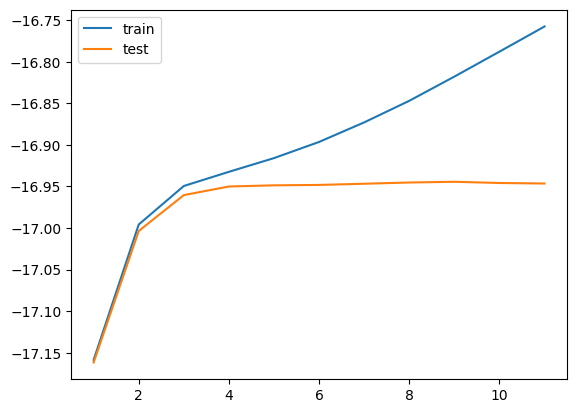

In [298]:
# Paso 7: Plot Overfit
ax = plt.axes()
ax.plot(resultados['param_max_depth'],resultados['mean_train_score'],label='train')
ax.plot(resultados['param_max_depth'],resultados['mean_test_score'],label='test')
ax.legend()

In [299]:
# 5) ¿Cuáles son los 3 géneros musicales con más canciones?

# Hay canciones que tienen multiples géneros musicales. Estas son:
mixed_genres = df_clean[df_clean['track_genre'].str.contains(';')]

# Para simplificar el filtro de géneros, lo nombraremos como una categoría de género "Mixed":
df_clean['track_genre'] = df_clean['track_genre'].apply(lambda x:'mixed' if ';' in x else x)

# Contar las canciónes por género:
genre_count = df_clean['track_genre'].value_counts(sort=True)
print("Los 3 géneros musicales con más canciones son:")
genre_count.head(3)

# Ya que hay más de un género en algunas filas, primero podemos separar estos en filas:
#df_expand_genre = df_clean.assign(track_genre=df['track_genre'].str.split(';')).explode('track_genre')

# Contar las canciónes por género:
#genre_count = df_expand_genre['track_genre'].value_counts(sort=True)

#print("Los 3 géneros musicales con más canciones son:")
#genre_count.head(3)

Los 3 géneros musicales con más canciones son:


,count
track_genre,
mixed,16641
tango,999
sleep,997


In [300]:
# 6) De los artistas que su nombre empieza con la letra "F", ¿cuál es el que en promedio tiene canciones más populares?
# Encontrar artistas que tienen nombre empezando con "F":
artistsF = df_expand_artists[df_expand_artists['artists'].str.startswith('F')]

# Los artistas más populares pueden ser definidos como la suma  de popularidad de todas sus canciones
popu_artistsF_sum = artistsF.groupby('artists')['popularity'].sum().reset_index()

# Renombrar la columna como la suma de popularidad:
popu_artistsF_sum = popu_artistsF_sum.rename(columns={'popularity': 'popularity_sum'})

# Poner la columna de popularity sum en descendiendo:
print("El artista con nombre empezando en con la letra "F" que tienen las canciones más populares en promedio es:")
popu_artistsF_sum.sort_values(by=['popularity_sum'],ascending=False).head(1)



El artista con nombre empezando en con la letra  que tienen las canciones más populares en promedio es:


,artists,popularity_sum
187,Feid,11584.0


In [301]:
# 7) ¿Cuáles son las 5 canciones más "bailables"?
# Sort danceability en descendiendo
df_max_dance = df_clean.sort_values(by=['danceability'],ascending=False)

print("Top 5 canciones más bailables")
df_max_dance[['track_name', 'danceability']].head(5) # Filtra a columna de canciones y danceability para los top 5



Top 5 canciones más bailables


,track_name,danceability
57026,Sol Clap,0.985
66160,Medicaid Baby,0.984
22173,Inspiration,0.983
5815,Daily Routines,0.982
52304,Bitches,0.981


In [302]:
# 8) ¿Cuáles son los atributos más correlacionados de una canción?
# Paso 1: Definir las variables ordinales
# Nueva variable para definir si una canción es popular o no (binary)
df_clean['popular'] = df_clean['popularity'] > 50  # Popularidad mayor a 50 es popular
target = 'popular'
atributos = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'time_signature']
X = df_clean[atributos]
y = df_clean[target]

# Paso 2: Separar train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Usar Random Forest Classifier como modelo de relacion entre atributos
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(max_depth=5)
modelo.fit(X_train, y_train)

# Encontrar la importancia por cara atributo:
importances = modelo.feature_importances_
atributos_nombres = X.columns

# Crear un data frame mostrando la importancia de cada atributo
resultados = pd.DataFrame({'Feature': atributos_nombres, 'Importance': importances})
resultados = resultados.sort_values(by='Importance', ascending=False) # Reordenar

# Imprimir resultados
print("Atributos en orden de importancia para predecir si una canción es popular:")
resultados


Atributos en orden de importancia para predecir si una canción es popular:


,Feature,Importance
8,instrumentalness,0.164508
9,liveness,0.140551
0,duration_ms,0.132787
4,loudness,0.130553
2,energy,0.094716
10,valence,0.094039
7,acousticness,0.092027
1,danceability,0.080097
6,speechiness,0.044760
11,tempo,0.017679


In [303]:
# Paso 3: Comparar utilizar una matriz de correlacion que asume una correlación lineal:
matriz = df_clean[atributos].corr()
# Crear DataFrame de la matriz
correlacion = pd.DataFrame(matriz.stack(), columns=['Correlation'])

# Quitar los elementos diagonales
correlacion = correlacion[correlacion.index.get_level_values(0) != correlacion.index.get_level_values(1)]

# Ordenar en descendiendo por valor absoluto
correlacion = correlacion.sort_values(by='Correlation', key=abs, ascending=False)
correlacion.head()

""" Ya que la relacion entre atributos es compleja, lo más probable es que la
se tengan que analizar uno por uno utilizando random forest classifier. De la tabla
anterior, la popularidad y el instumentalness tenían la mayo correlacion. Posiblemente,
el instumentalness y el liveness también tienen una alto nivel de correlacion ya que
ambos tienen una importancia de prediccion alta."""

,,Correlation
energy,loudness,0.758774
loudness,energy,0.758774
energy,acousticness,-0.732566
acousticness,energy,-0.732566
loudness,acousticness,-0.582663
